In [337]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
import seaborn as sns

In [338]:
def wrangle(filepath):
    hd=pd.read_csv(filepath)
    #removing outliers in median_income. using top 10% and bottom 75% percent. making it 65%)
    low=hd["median_income"].quantile(0.1)
    high=hd["median_income"].quantile(0.75)
    mask = hd["median_income"].between(low,high)
    hd = hd[mask]
    #dropping high cardinality variable 
    hd.drop(columns=["total_rooms","population", "total_bedrooms", "households","housing_median_age"],inplace=True)
    #removing outliers in median housing value. using min and 80% 
    high = hd["median_house_value"].quantile(0.8)
    low = hd["median_house_value"].min()
    test =  hd["median_house_value"].between(low, high)
    hd = hd[test]

    return hd

In [339]:
data = wrangle("housing.csv")

In [340]:
data.head()

,longitude,latitude,median_income,median_house_value,ocean_proximity
8,-122.26,37.84,2.0804,226700.0,NEAR BAY
12,-122.26,37.85,3.0750,213500.0,NEAR BAY
13,-122.26,37.84,2.6736,191300.0,NEAR BAY
14,-122.26,37.85,1.9167,159200.0,NEAR BAY
15,-122.26,37.85,2.1250,140000.0,NEAR BAY


In [235]:
data.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value
count,10735.000000,10735.000000,10735.000000,10735.000000,10735.000000
mean,-119.455622,35.716009,28.009129,3.156643,144094.503773
std,1.977215,2.232365,12.071171,0.759224,47659.121601
min,-124.350000,32.550000,1.000000,1.903800,14999.000000
25%,-121.380000,33.940000,18.000000,2.526050,105500.000000
50%,-118.440000,34.280000,29.000000,3.098200,144800.000000
75%,-117.950000,37.790000,36.000000,3.745200,181300.000000
max,-114.570000,41.950000,52.000000,4.742600,236400.000000


#EXploring the features to select


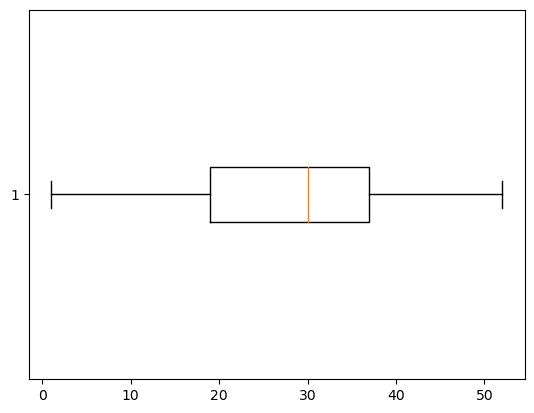

In [155]:
plt.boxplot(data["housing_median_age"], vert=False);

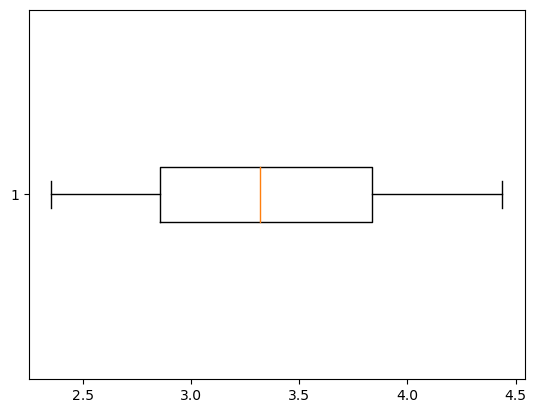

In [156]:
plt.boxplot(data["median_income"], vert=False);

(array([1084., 1256., 1352., 1250., 1448., 1348., 1324., 1125., 1231.,
         970.]),
 array([1.9038 , 2.15717, 2.41054, 2.66391, 2.91728, 3.17065, 3.42402,
        3.67739, 3.93076, 4.18413, 4.4375 ]),
 <BarContainer object of 10 artists>)

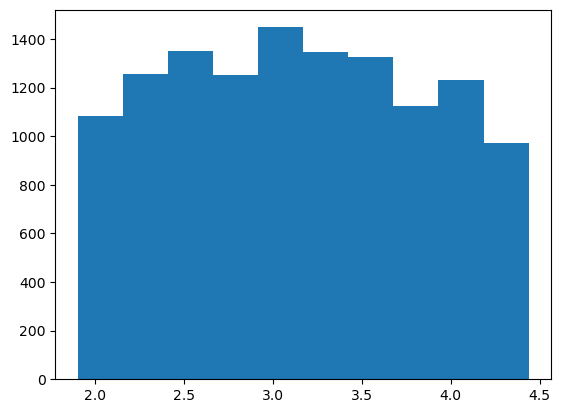

In [164]:
plt.hist(data["median_income"])

In [151]:
data["median_income"].isnull().sum()

0

## Check for null in median income

In [48]:
data["median_income"].isnull().sum()

0

######  There are no null values in median income

In [50]:
data["total_rooms"].value_counts()

total_rooms
1722.0     14
1748.0     13
1613.0     13
1527.0     13
1607.0     13
           ..
605.0       1
3346.0      1
3693.0      1
6911.0      1
10035.0     1
Name: count, Length: 4857, dtype: int64

#plotting a box plot for total number of room


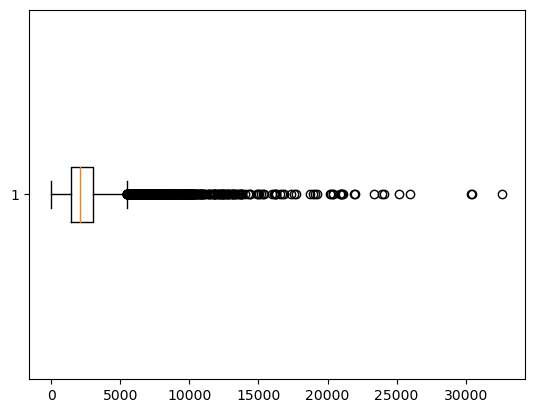

In [51]:
plt.boxplot(data["total_rooms"], vert=False);

In [52]:
data["total_rooms"].describe()

count    13418.000000
mean      2537.593755
std       1946.137027
min          2.000000
25%       1442.000000
50%       2097.500000
75%       3056.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [119]:
data.nunique()

longitude              799
latitude               836
housing_median_age      52
households            1626
median_income         7015
median_house_value    3009
ocean_proximity          5
dtype: int64

#Exploring total_bedrooms

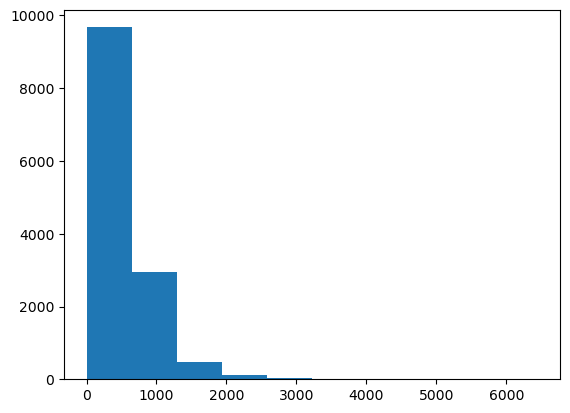

In [66]:
plt.hist(data["total_bedrooms"]);

#checking for nulls in total_bedrooms

In [67]:
data["total_bedrooms"].isnull().sum()

134

In [68]:
data["total_bedrooms"].describe()

count    13284.000000
mean       553.848389
std        415.505027
min          2.000000
25%        308.000000
50%        455.000000
75%        671.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [86]:
high = data["total_bedrooms"].quantile(0.25)

In [87]:
low = data["total_bedrooms"].min()

In [103]:
mask = data["total_bedrooms"].between(low,high)

In [107]:
test = data[mask]

In [108]:
test["total_bedrooms"].describe()

count    3331.000000
mean      212.755929
std        74.696110
min         2.000000
25%       169.000000
50%       231.000000
75%       273.000000
max       308.000000
Name: total_bedrooms, dtype: float64

(array([ 89., 100., 124., 155., 235., 304., 428., 521., 657., 718.]),
 array([  2. ,  32.6,  63.2,  93.8, 124.4, 155. , 185.6, 216.2, 246.8,
        277.4, 308. ]),
 <BarContainer object of 10 artists>)

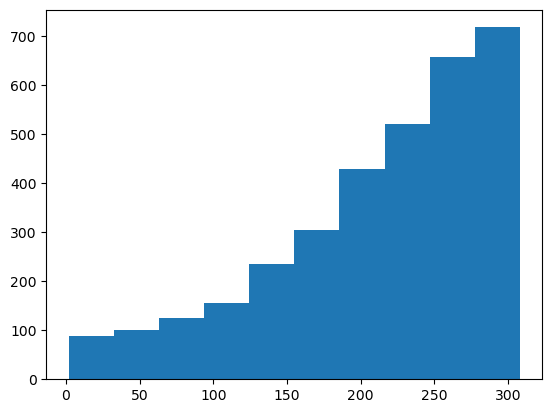

In [110]:
plt.hist(test["total_bedrooms"])

In [113]:
test["total_bedrooms"].nunique()

303

#exploring median household

In [117]:
data["housing_median_age"].describe()

count    13418.000000
mean        29.221419
std         12.419505
min          1.000000
25%         19.000000
50%         30.000000
75%         38.000000
max         52.000000
Name: housing_median_age, dtype: float64

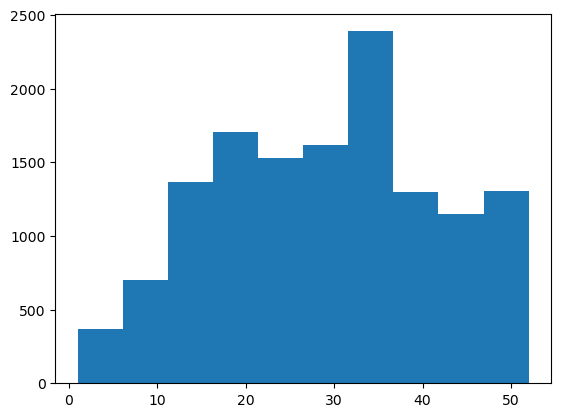

In [118]:
plt.hist(data["housing_median_age"]);

coerrelation between the features


In [249]:
prox_price =  data.select_dtypes(float).corr()
prox_price


,longitude,latitude,median_income,median_house_value
longitude,1.000000,-0.922995,0.032990,0.082235
latitude,-0.922995,1.000000,-0.067649,-0.270875
median_income,0.032990,-0.067649,1.000000,0.407895
median_house_value,0.082235,-0.270875,0.407895,1.000000


<Axes: >

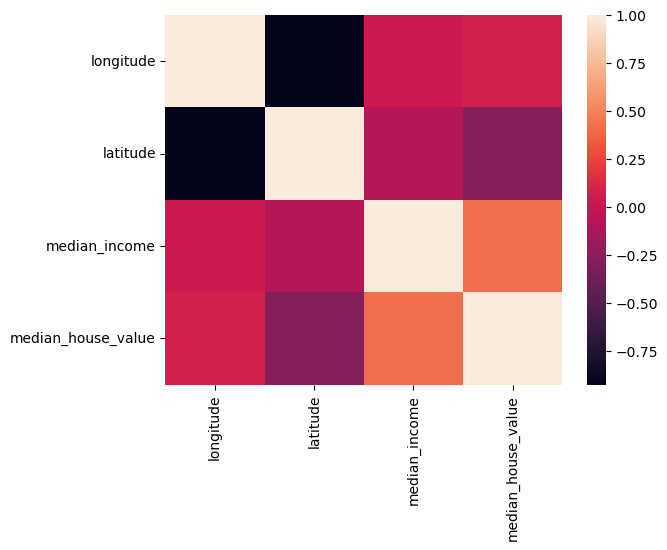

In [250]:
sns.heatmap(prox_price)

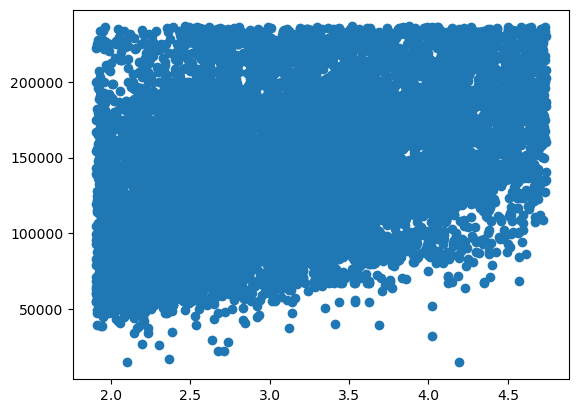

In [236]:
plt.scatter(x= data["median_income"], y=data["median_house_value"])

#exploring median house value

In [176]:
data["median_house_value"].isnull().sum()

0

(array([ 369., 2697., 3482., 3010., 1788.,  865.,  519.,  257.,  162.,
         269.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

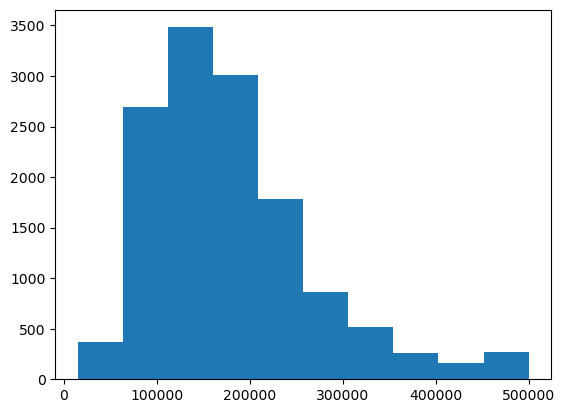

In [177]:
plt.hist(data["median_house_value"])

In [178]:
data["median_house_value"].describe()

count     13418.000000
mean     179462.422120
std       89573.102606
min       14999.000000
25%      115600.000000
50%      162500.000000
75%      220275.000000
max      500001.000000
Name: median_house_value, dtype: float64

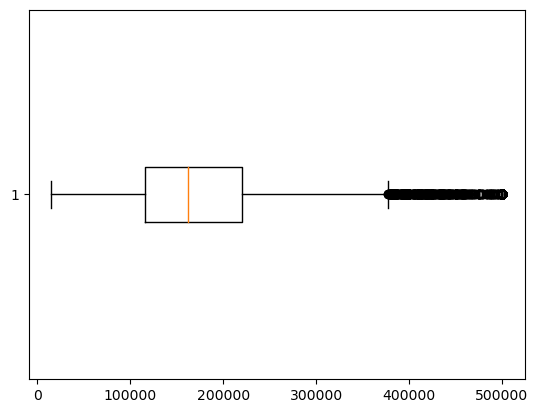

In [180]:
plt.boxplot(data["median_house_value"], vert=False);

In [222]:
high = data["median_house_value"].quantile(0.8)
low = data["median_house_value"].min()
test =  data["median_house_value"].between(low, high)


In [223]:
df = data[test]
df["median_house_value"].describe()

count     10735.000000
mean     144094.503773
std       47659.121601
min       14999.000000
25%      105500.000000
50%      144800.000000
75%      181300.000000
max      236400.000000
Name: median_house_value, dtype: float64

<Axes: ylabel='Frequency'>

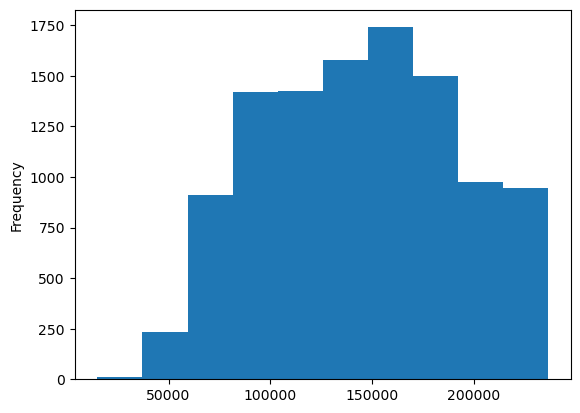

In [224]:
df["median_house_value"].plot(kind="hist")

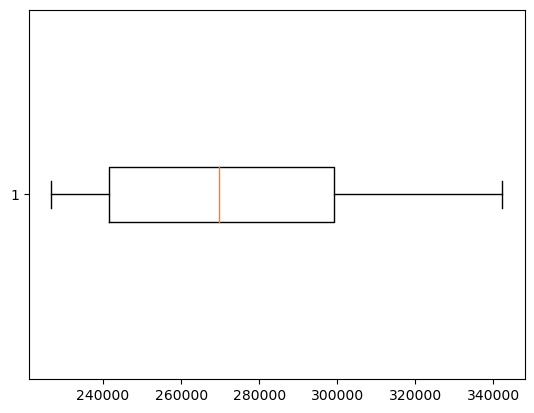

In [225]:
plt.boxplot(thirty["median_house_value"], vert=False);

In [226]:
corr = 

0.4078948096866495

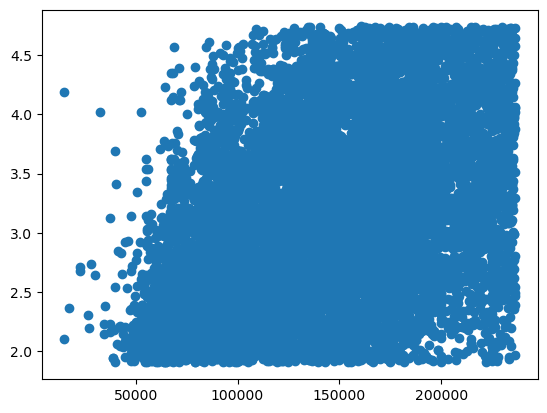

In [244]:
plt.scatter(x=df["median_house_value"], y=df["median_income"])

BUILDING THE MODEL

In [252]:
feature= ["latitude","longitude","median_income","ocean_proximity"]
X= data[feature]
X.head()

,latitude,longitude,median_income,ocean_proximity
8,37.84,-122.26,2.0804,NEAR BAY
12,37.85,-122.26,3.0750,NEAR BAY
13,37.84,-122.26,2.6736,NEAR BAY
14,37.85,-122.26,1.9167,NEAR BAY
15,37.85,-122.26,2.1250,NEAR BAY


In [255]:
target= "median_house_value"
y = data[target]
y.head()
#target should be a series

8     226700.0
12    213500.0
13    191300.0
14    159200.0
15    140000.0
Name: median_house_value, dtype: float64

In [258]:
y_mean= y.mean()
y_pred_baseline = [y_mean] * len(X)
y_pred_baseline

[144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,
 144094.5037727061,


#splitting the data

In [325]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=0)
X_train

,latitude,longitude,median_income,ocean_proximity
16468,38.12,-121.27,2.5587,INLAND
17756,37.35,-121.81,4.3750,<1H OCEAN
7821,33.91,-118.12,3.5772,<1H OCEAN
14049,32.76,-117.13,1.9392,NEAR OCEAN
19197,38.45,-122.69,3.9191,<1H OCEAN
...,...,...,...,...
17556,37.33,-121.88,2.8594,<1H OCEAN
9128,34.56,-118.07,4.2329,INLAND
6233,34.07,-117.95,3.2083,<1H OCEAN
19230,38.47,-122.66,3.7617,<1H OCEAN


In [303]:
model = make_pipeline(
    OneHotEncoder(handle_unknown= "ignore"),
    Ridge()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('ridge', Ridge())])

In [304]:
model.predict(X_train)

array([ 96351.62655179, 201630.68241365, 197011.90934224, ...,
       173127.99149191, 176986.47920472, 124436.16934429])

In [305]:
MAE = mean_absolute_error(y_train, model.predict(X_train)).round(2)
MAE

14600.06

TEst the model

In [306]:
model.predict(X_val)

array([170866.85269578, 121840.65252189,  59948.19268992, ...,
       112594.47972425, 166140.88680896, 147172.16508052])

In [308]:
Test_MAE= mean_absolute_error(y_val, model.predict(X_val)).round(2)
Test_MAE

26432.19

Communicate your results

using a mapbox

In [317]:
fig = px.scatter_mapbox(
    data,
    lat = "latitude",
    lon="longitude",
    width= 600,
    height= 600,
    center= {"lat":36.778259, "lon":-119.417931},
    hover_data=["median_house_value"]
)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

using equation

In [318]:
intercept=model["ridge"].intercept_
coefficient= model["ridge"].coef_
print(
    f"median_house_value={intercept} + (lon * {coefficient[0]}) + (lat* {coefficient[1]}) + (median_income* {coefficient[2]})"

)

median_house_value=144528.22360443234 + (lon * -11286.814065787088) + (lat* -14246.743107373295) + (median_income* -16842.232330607054)


Using a deployment function

In [331]:
def make_prediction(latitude, longitude, median_income, ocean_proximity):
    data={
        "latitude": latitude,
        "longitude":longitude,
        "median_income": median_income,
        "ocean_proximity":ocean_proximity
    }
    df=pd.DataFrame(data, index=[0])
    prediction= model.predict(df).round(2)
    return f"price= ${prediction}"

In [334]:
make_prediction(37.84,-122.26, 2.0804,"NEARBAY")

'price= $[161746.07]'

#Using interactive dashboard

In [348]:
interact(
    make_prediction,
    latitude= FloatSlider(
        min=X_train["latitude"].min(),
        max=X_train["latitude"].max(),
        step=0.01,
        value=X_train["latitude"].mean(),
    ),
    longitude= FloatSlider(
        min=X_train["longitude"].min(),
        max=X_train["longitude"].max(),
        step=0.01,
        value=X_train["longitude"].mean(),
    ),
    median_income= FloatSlider(
        min=X_train["median_income"].min(),
        max=X_train["median_income"].max(),
        step=0.01,
        value=X_train["median_income"].mean(),
    ),
    ocean_proximity= Dropdown(
        options = data["ocean_proximity"].unique()
    )
    

);

interactive(children=(FloatSlider(value=35.72806939916162, description='latitude', max=41.95, min=32.56, step=…